LAB M1.08 Whisper STT Evaluation
Cindy Lund


Welcome to the Whisper STT Evaluation lab! In this exercise, you'll conduct a comprehensive evaluation of OpenAI's Whisper API to assess its transcription accuracy and performance. This is a real-world scenario where you need to evaluate an AI service before deploying it at scale.

In [ ]:
#Installation of packages and dependencies for the notebook
%pip install sounddevice numpy scipy soundfile matplotlib openai pandas jiwer

#matplotlib → used by visualize_waveform() to plot the signal
#numpy → used to handle the audio array
#sounddevice → records the audio
#soundfile / scipy → saves and loads WAV files

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   -------------------- ------------------- 0.8/1.5 MB 3.6 MB/s eta 0:00:01
   ---------------------------------- ----- 1.3/1.5 MB 3.5 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 3.0 MB/s  0:00:00

   ---------------------------------------- 0/2 [rapidfuzz]
   ---------------------------------------- 2/2 [jiwer]

Note: you may need to restart the kernel to use updated packages.


In [4]:
# Importing necessary libraries and imports for recording, processing, and evaluating audio data
import sounddevice as sd
import numpy as np
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import time
from pathlib import Path



In [7]:
#Cell 3 — Recording helper functions

def record_audio(duration=45, sample_rate=16000):
    """Record audio for specified duration"""
    print(f"🎤 Recording for {duration} seconds...")
    print("Get ready...")
    time.sleep(2)
    
    # Countdown
    for i in range(3, 0, -1):
        print(f"Starting in {i}...")
        time.sleep(1)
    
    print("🔴 RECORDING! Speak now!")
    
    # Record audio
    audio = sd.rec(int(duration * sample_rate), 
                   samplerate=sample_rate, 
                   channels=1, 
                   dtype='float32')
    sd.wait()
    
    print("✅ Recording complete!")
    return audio.flatten(), sample_rate

# Record your audio
audio, sr = record_audio(duration=45)  # 45 seconds

# Save to file
audio = np.clip(audio, -1, 1)
audio_int16 = (audio * 32767).astype(np.int16)
wavfile.write('my_audio_recording.wav', sr, audio_int16)
print("✅ Saved to 'my_audio_recording.wav'")



🎤 Recording for 45 seconds...
Get ready...
Starting in 3...
Starting in 2...
Starting in 1...
🔴 RECORDING! Speak now!
✅ Recording complete!
✅ Saved to 'my_audio_recording.wav'


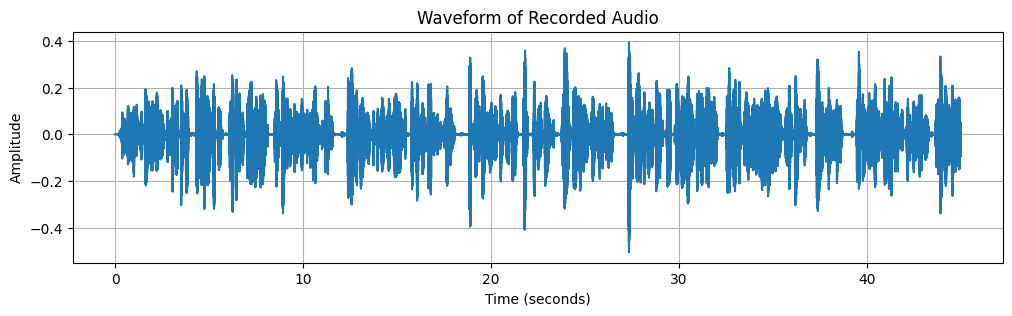

In [8]:
# --- Waveform visualization (nice-to-have sanity check) ---

# Create a time axis (seconds)
t = np.arange(len(audio)) / sr

plt.figure(figsize=(12, 3))
plt.plot(t, audio)
plt.title("Waveform of Recorded Audio")
plt.xlabel("Time (seconds)")
plt.ylabel("Amplitude")
plt.grid(True)
plt.show()


In [9]:
import os
from openai import OpenAI
from pathlib import Path


In [20]:
# Initialize OpenAI client (uses OPENAI_API_KEY from environment)
client = OpenAI(api_key=os.getenv("OPENAI_API_KEY"))

audio_path = Path("my_audio_recording.wav")
assert audio_path.exists(), f"Audio file not found: {audio_path.resolve()}"

with audio_path.open("rb") as f:
    result = client.audio.transcriptions.create(
        model="gpt-4o-mini-transcribe",
        file=f
    )

whisper_text = result.text
print(whisper_text)


Skier Lindsey Vonn has undergone surgery on a left leg fracture after suffering heartbreak in what could be her final Olympic event as she crashed in the women's downhill competition in Cortina. The 41-year-old was competing just nine days after rupturing ligaments in her left knee, but hitting the gate with her ski pole on her first jump left Vonn off balance, denying a fairytale ending to a remarkable story. Vonn was airlifted off the piste to Ca' Foncello hospital in Treviso, around 130km from Olympia del Tofane in the Dolomites, following a lengthy treatment. The hospital issued a statement which said she had undergone orthopedic surgery to stabilize the fracture she had.


In [21]:
# Save the transcription to a text file
out_path = Path("whisper_transcription.txt")
out_path.write_text(whisper_text, encoding="utf-8")
print(f"✅ Saved Whisper transcription to: {out_path.resolve()}")


✅ Saved Whisper transcription to: C:\Users\cindy\OneDrive\Documents\AI Ironhack Coursework\vscode101\WEEK01\Lab M1.08 Whisper STT Evaluation\whisper_transcription.txt


In [ ]:
#Step 3 — Create Ground Truth (human-corrected) transcript

In [22]:
#Load the Whisper transcript as starting point
from pathlib import Path

whisper_path = Path("whisper_transcription.txt")
whisper_text = whisper_path.read_text(encoding="utf-8")

print("---- Whisper transcript (starting point) ----")
print(whisper_text)


---- Whisper transcript (starting point) ----
Skier Lindsey Vonn has undergone surgery on a left leg fracture after suffering heartbreak in what could be her final Olympic event as she crashed in the women's downhill competition in Cortina. The 41-year-old was competing just nine days after rupturing ligaments in her left knee, but hitting the gate with her ski pole on her first jump left Vonn off balance, denying a fairytale ending to a remarkable story. Vonn was airlifted off the piste to Ca' Foncello hospital in Treviso, around 130km from Olympia del Tofane in the Dolomites, following a lengthy treatment. The hospital issued a statement which said she had undergone orthopedic surgery to stabilize the fracture she had.


In [15]:
#To hear the audio again while you edit the ground truth, you can run this cell:
from IPython.display import Audio

Audio(filename="my_audio_recording.wav")


In [24]:
#Cell (Step 3): Create a “ground truth” text you can edit
ground_truth_path = Path("ground_truth.txt")

# Only create it if it doesn't exist yet (so you don't overwrite your edits)
if not ground_truth_path.exists():
    ground_truth_path.write_text(whisper_text, encoding="utf-8")
    print(f"✅ Created {ground_truth_path} from Whisper transcript. Now edit it manually.")
else:
    print(f"ℹ️ {ground_truth_path} already exists. Open it and edit as needed.")


✅ Created ground_truth.txt from Whisper transcript. Now edit it manually.


In [26]:
#Verify the ground truth is loaded (checkpoint)
ground_truth_text = ground_truth_path.read_text(encoding="utf-8")

print("---- Ground truth (after your edits) ----")
print(ground_truth_text)
print("\n✅ Ground truth loaded. Length (chars):", len(ground_truth_text))


---- Ground truth (after your edits) ----
Skier Lindsey Vonn has undergone surgery on a left leg fracture after suffering heartbreak in what could be her final Olympic event as she crashed in the women's downhill competition in Cortina. The 41-year-old was competing just nine days after rupturing ligaments in her left knee, but hitting the gate with her ski pole on her first jump left Vonn off balance, denying a fairytale ending to a remarkable story. Vonn was airlifted off the piste to Ca' Foncello hospital in Treviso, around 130km from Olympia del Tofane in the Dolomites, following a lengthy treatment. The hospital issued a statement which said she had undergone orthopedic surgery to stabilize the fracture she

✅ Ground truth loaded. Length (chars): 679


In [27]:
#Step 4 — WER + error breakdown (clean + compatible)
import json
import jiwer
from pathlib import Path


In [28]:
#Load the two texts from files
whisper_text = Path("whisper_transcription.txt").read_text(encoding="utf-8")
ground_truth_text = Path("ground_truth.txt").read_text(encoding="utf-8")

print("Loaded Whisper + Ground Truth ✅")



Loaded Whisper + Ground Truth ✅


In [32]:
def calculate_wer(reference: str, hypothesis: str) -> dict:
    transform = jiwer.Compose([
        jiwer.ToLowerCase(),
        jiwer.RemovePunctuation(),
        jiwer.RemoveMultipleSpaces(),
        jiwer.Strip(),
    ])

    ref_clean = transform(reference)
    hyp_clean = transform(hypothesis)

    measures = jiwer.process_words(ref_clean, hyp_clean)

    return {
    "wer": measures.wer,
    "substitutions": measures.substitutions,
    "insertions": measures.insertions,
    "deletions": measures.deletions,
    "hits": measures.hits,
    "reference_words": len(ref_clean.split()),
    "hypothesis_words": len(hyp_clean.split()),
    "accuracy": 1 - measures.wer,
    }   


wer_results = calculate_wer(ground_truth_text, whisper_text)

print(f"WER: {wer_results['wer']:.4f} ({wer_results['wer']*100:.2f}%)")
print(f"Accuracy: {wer_results['accuracy']:.4f} ({wer_results['accuracy']*100:.2f}%)")
print("\nError breakdown:")
print("  Substitutions:", wer_results["substitutions"])
print("  Insertions   :", wer_results["insertions"])
print("  Deletions    :", wer_results["deletions"])
print("  Correct words:", wer_results["hits"])


WER: 0.0435 (4.35%)
Accuracy: 0.9565 (95.65%)

Error breakdown:
  Substitutions: 1
  Insertions   : 1
  Deletions    : 3
  Correct words: 111


In [33]:
#Save results for your report
import json
from pathlib import Path

Path("wer_results.json").write_text(
    json.dumps(wer_results, indent=2),
    encoding="utf-8"
)
print("✓ WER evaluation saved")


✓ WER evaluation saved


In [34]:
#For Step 5 the Cost Analysis - Get your audio duration (seconds + minutes)
import wave
from pathlib import Path

audio_path = Path("my_audio_recording.wav")

with wave.open(str(audio_path), "rb") as w:
    frames = w.getnframes()
    rate = w.getframerate()
    duration_sec = frames / float(rate)

duration_min = duration_sec / 60

print(f"Duration: {duration_sec:.2f} seconds ({duration_min:.4f} minutes)")


Duration: 45.00 seconds (0.7500 minutes)


In [35]:
# Pricing source: OpenAI API Pricing page (Transcription and speech generation)
# gpt-4o-mini-transcribe: $0.003 / minute (estimated)
PRICE_PER_MIN = 0.003


In [36]:
#Cost your recording + scenarios
def estimate_cost(minutes: float, price_per_min: float) -> float:
    return minutes * price_per_min

cost_one = estimate_cost(duration_min, PRICE_PER_MIN)

# Example volumes
scenarios = {
    "1 recording": 1,
    "10 recordings": 10,
    "100 recordings": 100,
    "1,000 recordings": 1000,
    "10,000 recordings": 10000,
}

print(f"Cost for your recording: ${cost_one:.6f}")

print("\nScenario estimates:")
for name, n in scenarios.items():
    print(f"- {name}: ${cost_one * n:.4f}")


Cost for your recording: $0.002250

Scenario estimates:
- 1 recording: $0.0023
- 10 recordings: $0.0225
- 100 recordings: $0.2250
- 1,000 recordings: $2.2500
- 10,000 recordings: $22.5000
